<a href="https://colab.research.google.com/github/sonali0109/Skin-Disorder-Prediction/blob/main/Skin_Disorder_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive #importing google drive

In [ ]:
drive.mount('/content/drive') #mounting the drive

Mounted at /content/drive


In [ ]:
#importing the liabriries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Business Case -**


*   Create a predictive model using machine learning techniques to predict the various classes of skin disease.

#### **Dataset Information**

##### **Class**
*   1: psoriasis
*   2: seboreic dermatitis
*   3: lichen planus
*   4: pityriasis rosea
*   5: cronic dermatitis
*   6: pityriasis rubra pilaris

##### **Family History**
*   0: Diseases has been observed in the family
*   1: Diseases has been not observed in the family

##### **Age**
*   Age feature simply represents the age of the patient

##### **Other feature (clinical and histopathological)**

*   0: indicates that the feature was not present
*   1,2: indicate the relative intermediate values
*   3: indicates the largest amount possible









In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Rubixe Projects/Skin Disorder Project/dataset_35_dermatology (1).csv') #loading the dataset

In [ ]:
data

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                    0                   0                         0   
1                    0                   0                         0   
2                    3                   0                         3   
3                    0                   0                         0   
4                    2                   0                         2   
..                 ...                 ...                       ...   
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
0                             1                  0  ...   
1                             1                  1  ...   
2                             0                  0  ...   
3                             3                  2  ...   
4                             0                  0  ...   
..                          ...                ...  ...   
361                           0                  0  ...   
362                           0                  0  ...   
363                           0                  0  ...   
364                           0                  0  ...   
365                           3                  3  ...   

     disappearance_of_the_granular_layer  \
0                                      0   
1                                      0   
2                                      0   
3                                      3   
4                                      2   
..                                   ...   
361                                    0   
362                                    1   
363                                    0   
364                                    0   
365                                    2   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                          0           3   
1                                          0           0   
2                                          2           3   
3                                          0           0   
4                                          3           2   
..                                       ...         ...   
361                                        0           1   
362                                        0           1   
363                                        3           0   
364                                        2           0   
365                                        0           0   

     saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                                0                     0   
1                                0                     0   
2                                2                     0   
3                                0                     0   
4   

In [ ]:
data.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
data.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  family_history  \
0                           1                  0               0   
1                           1                  1               1   
2                           0                  0               0   
3                           3                  2               0   
4                           0                  0               0   

   melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  \
0                     0                              0               0   
1                     0                              0               1   
2                     1                              0               0   
3                     0                              0               3   
4                     1                              0               0   

   fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
0                                 0           3           2               0   
1                                 0           1           2               0   
2                                 0           1           2               0   
3                                 0           0           2               0   
4                                 0           1           2               0   

   parakeratosis  clubbing_of_the_rete_ridges  elongation_of_the_rete_ridges  \
0              0                            0                              0   
1              2                            2                              2   
2              2                            0                              0   
3              3                            2                              2   
4              0                            0                              0   

   thinning_of_the_suprapapillary_epidermis  spongiform_pustule  \
0                                         0                   0   
1                                         2                   2   
2                                         0                   0   
3                                         2                   2   
4                                         0                   0   

   munro_microabcess  focal_hypergranulosis  \
0                  0                      0   
1                  1                      0   
2                  0                      2   
3                  0                      0   
4                  0                      2   

   disappearance_of_the_granular_layer  \
0                                    0   
1                                    0   
2                                    0   
3                                    3   
4                                    2   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \

In [ ]:
data.tail()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  family_history  \
361                           0                  0               0   
362                           0                  0               0   
363                           0                  0               0   
364                           0                  0               0   
365                           3                  3               0   

     melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  \
361                     0                              0               1   
362                     0                              0               0   
363                     2                              2               0   
364                     2                              0               0   
365                     0                              0               1   

     fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
361                                 0           1           1               0   
362                                 0           2           2               0   
363                                 0           3           3               0   
364                                 0           3           2               0   
365                                 0           0           2               0   

     parakeratosis  clubbing_of_the_rete_ridges  \
361              0                            0   
362              0                            0   
363              0                            0   
364              0                            0   
365              2                            3   

     elongation_of_the_rete_ridges  thinning_of_the_suprapapillary_epidermis  \
361                              0                                         0   
362                              0                                         0   
363                              0                                         0   
364                              0                                         0   
365                              2                                         3   

     spongiform_pustule  munro_microabcess  focal_hypergranulosis  \
361                   0                  0                      0   
362                   0                  0                      0   
363                   0                  0                      3   
364                   0                  0                      3   
365                   0                  2                      0   

     disappearance_of_the_granular_layer  \
361                                    0   
362                                    1   
363                                    0   
364                                    0   
365                                    2   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
361                                        0           1   
362                                        0           1   
363                                        3           0   
364                                        2           0   


## Basic Checks

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

### **Insights**

*   The Age column is in object, we have to convert it into integer



In [ ]:
data.describe()

erythema     scaling  definite_borders     itching  \
count  366.000000  366.000000        366.000000  366.000000   
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules  \
count          366.000000         366.000000          366.000000   
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              1.000000           0.000000            0.000000   
max              3.000000           3.000000            3.000000   

       oral_mucosal_involvement  knee_and_elbow_involvement  \
count                366.000000                  366.000000   
mean                   0.377049                    0.614754   
std                    0.834147                    0.982979   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    1.000000   
max                    3.000000                    3.000000   

       scalp_involvement  family_history  melanin_incontinence  \
count         366.000000      366.000000            366.000000   
mean            0.519126        0.125683              0.404372   
std             0.905639        0.331946              0.869818   
min             0.000000        0.000000              0.000000   
25%             0.000000        0.000000              0.000000   
50%             0.000000        0.000000              0.000000   
75%             1.000000        0.000000              0.000000   
max             3.000000        1.000000              3.000000   

       eosinophils_in_the_infiltrate  PNL_infiltrate  \
count                     366.000000      366.000000   
mean                        0.139344        0.546448   
std                         0.411790        0.815451   
min                         0.000000        0.000000   
25%                         0.000000        0.000000   
50%                         0.000000        0.000000   
75%                         0.000000        1.000000   
max                         2.000000        3.000000   

       fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  \
count                        366.000000  366.000000  366.000000   
mean                           0.336066    1.368852    1.956284   
std                            0.853139    1.104418    0.712512   
min                            0.000000    0.000000    0.000000   
25%                            0.000000    0.000000    2.000000   
50%                            0.000000    2.000000    2.000000   
75%                            0.000000    2.000000    2.000000   
max                            3.000000    3.000000    3.000000   

       hyperkeratosis  parakeratosis  clubbing_of_the_rete_ridges  \
count      366.000000     366.000000                   366.000000   
mean         0.527322       1.289617                     0.663934   
std          0.757116       0.917562                     1.056829   
min          0.000000       0.000000                     0.000000   
25%          0.000000       1.000000                     0.000000   
50%          0.000000       1.000000                     0.000000   
75%          1.000000       2.000000                     2.000000   
max 

## Exploratory Data Analysis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 27.4 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


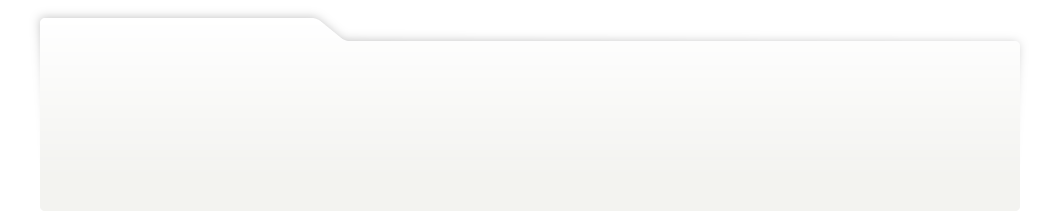
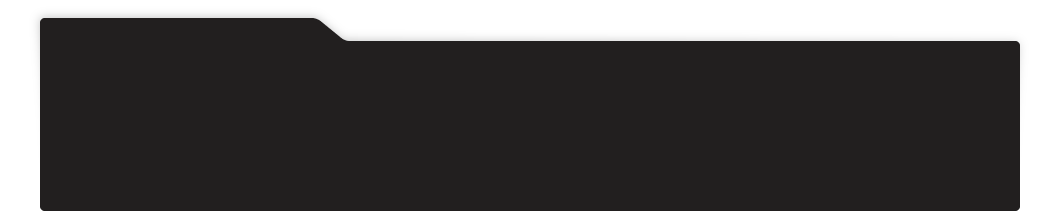
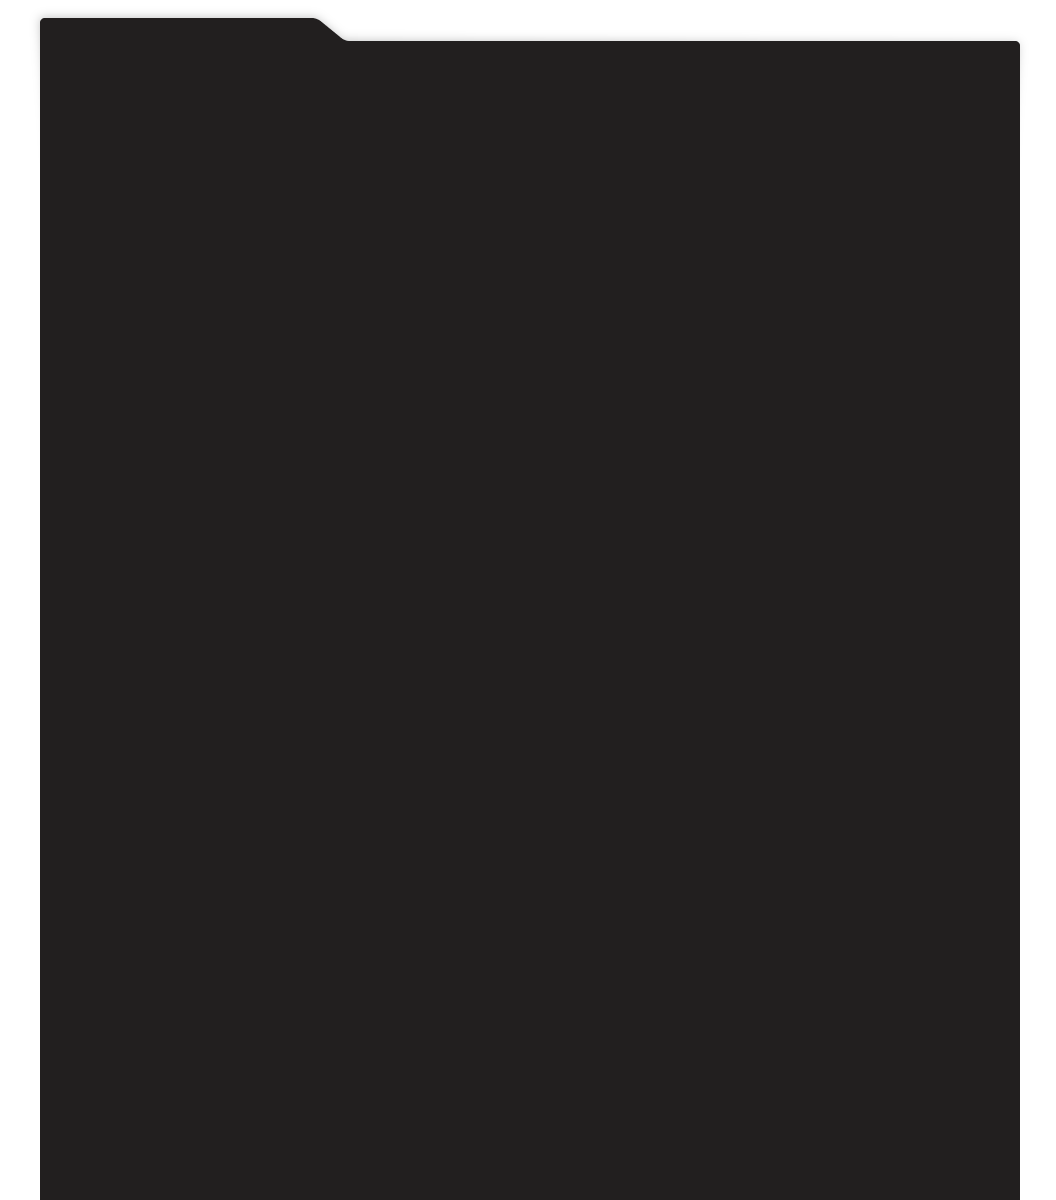
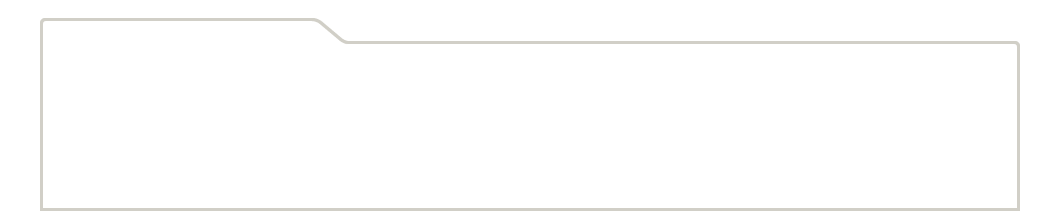
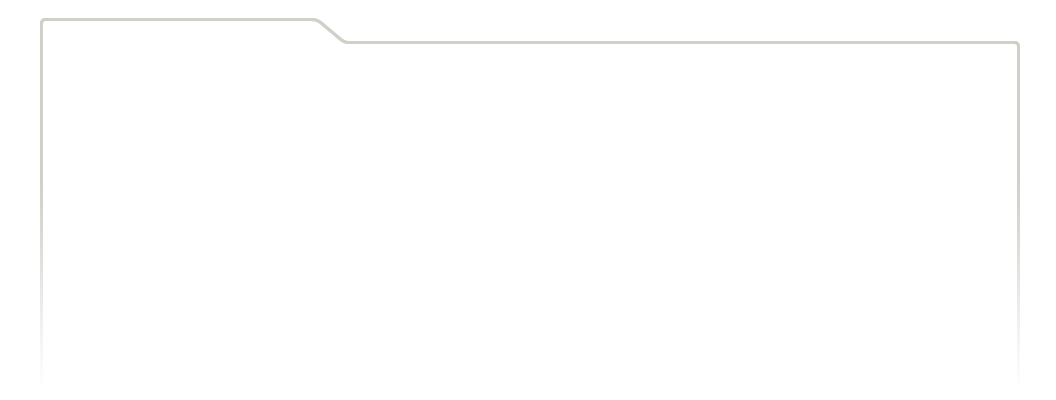
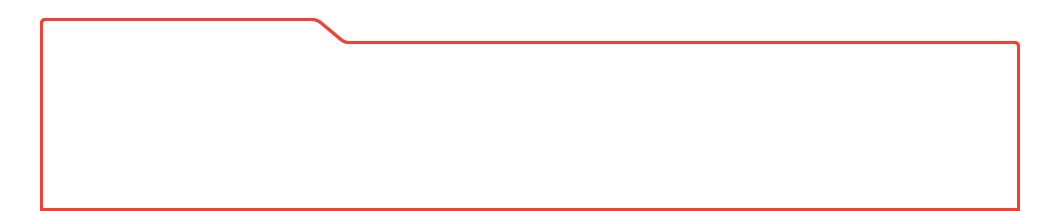
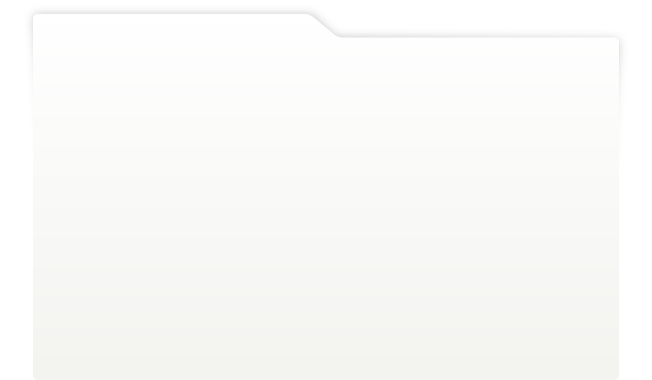
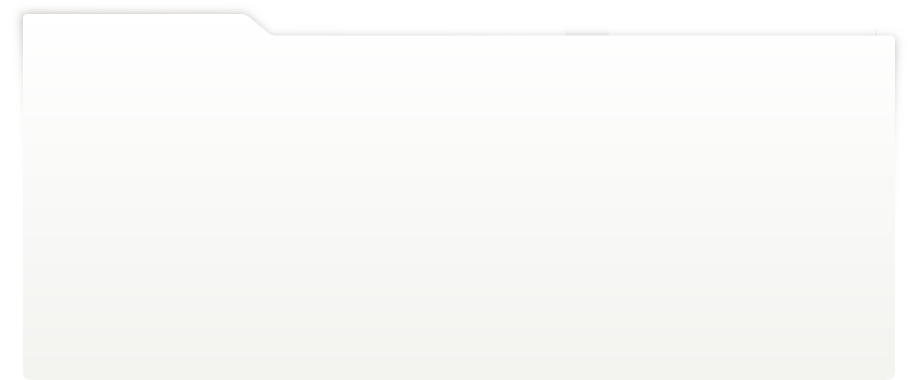
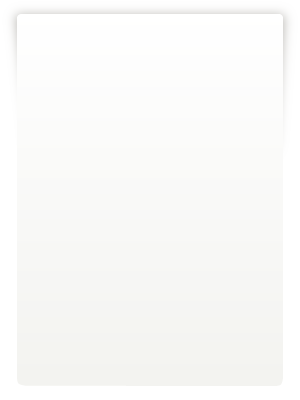
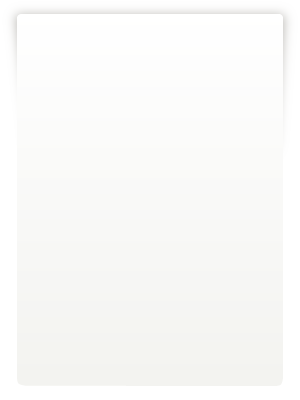
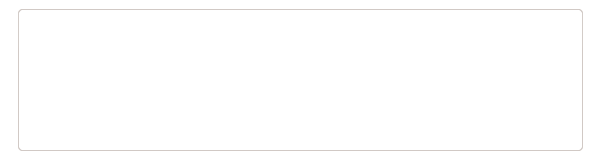
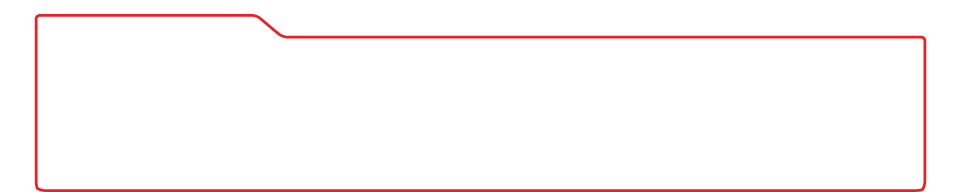
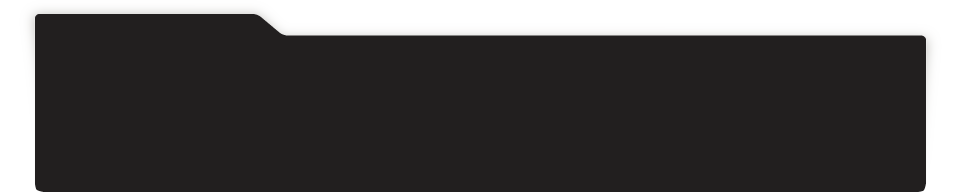
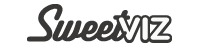
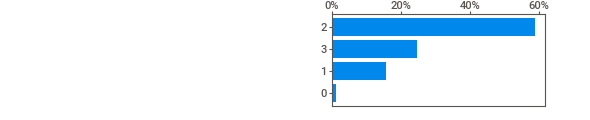
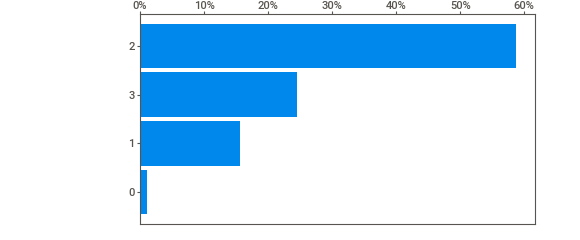
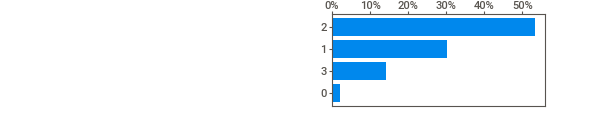
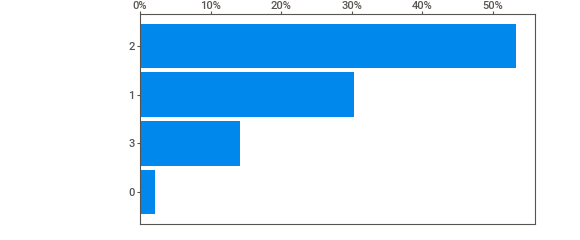
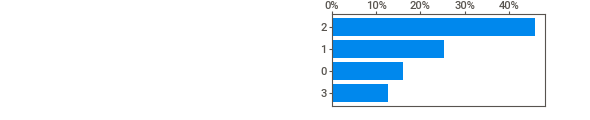
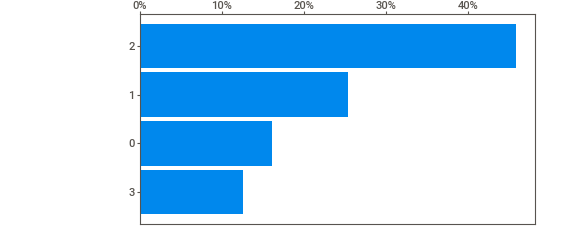
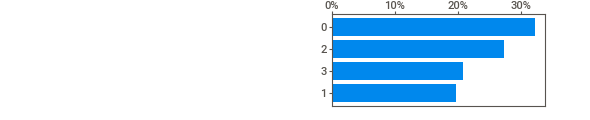
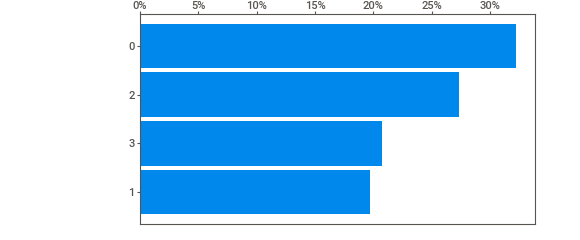
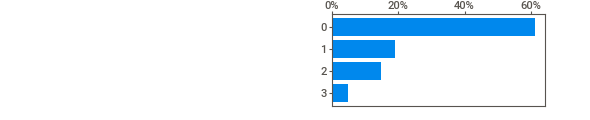
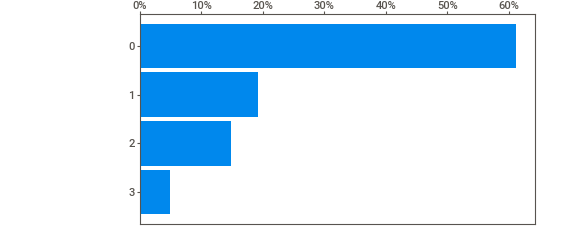
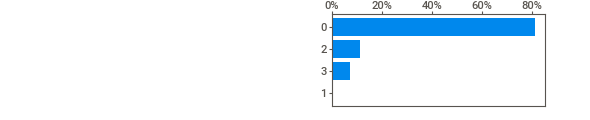
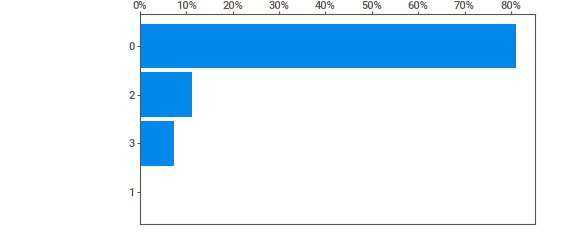
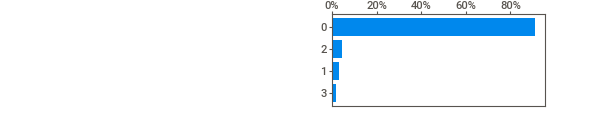
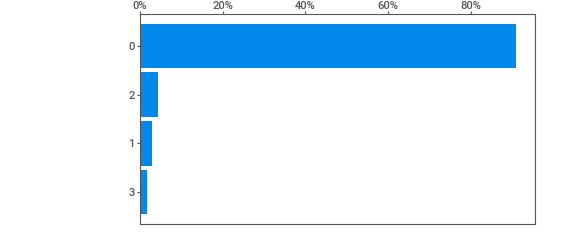
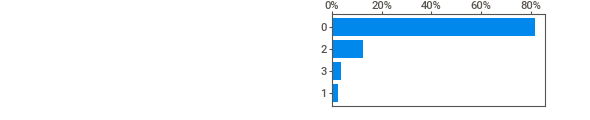
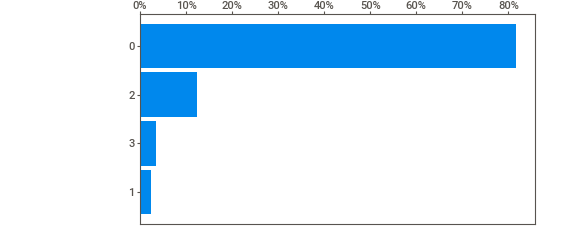
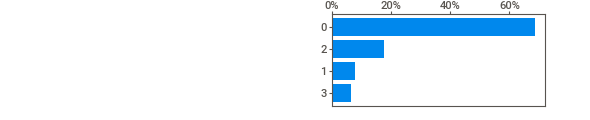
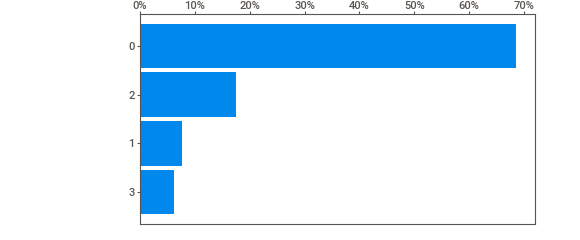
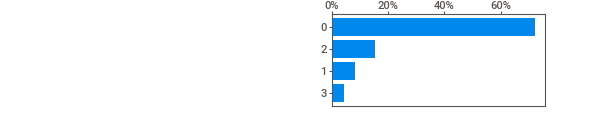
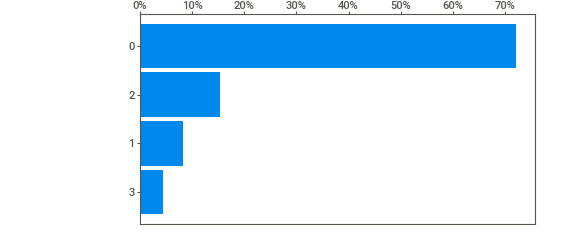
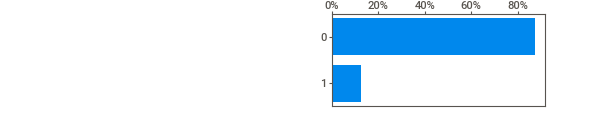
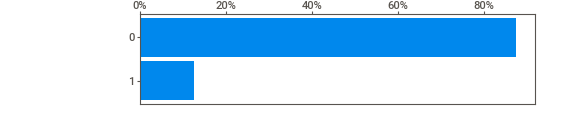
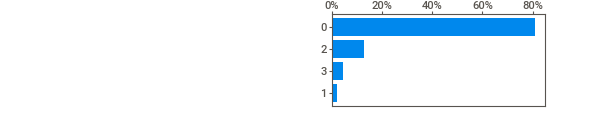
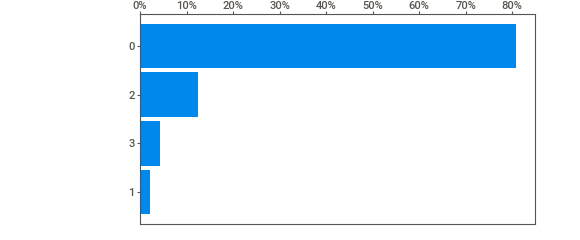
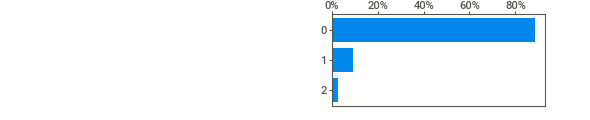
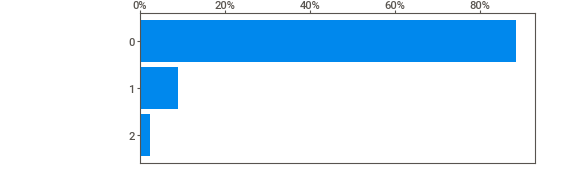
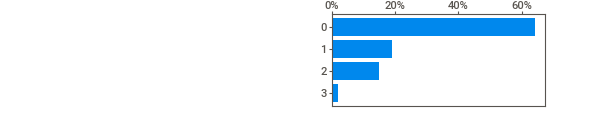
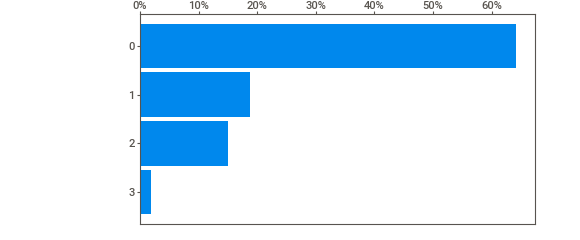
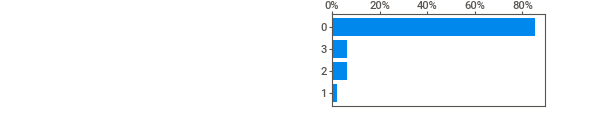
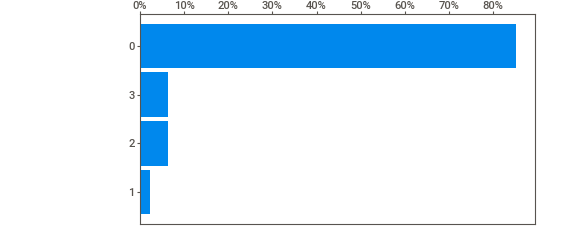
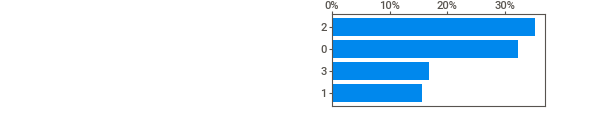
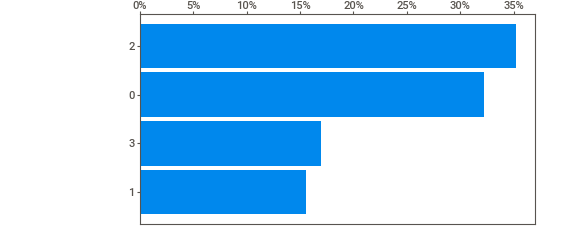
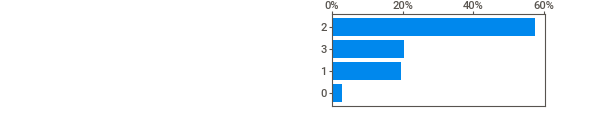
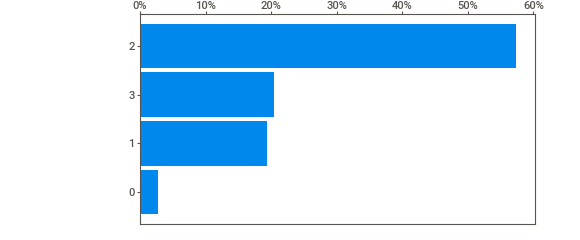
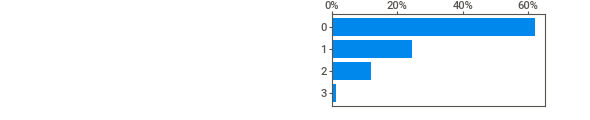
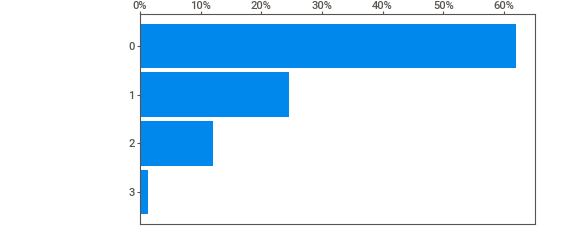
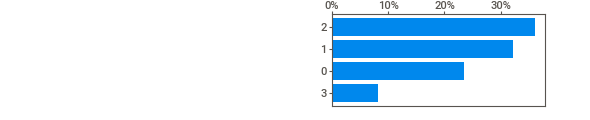
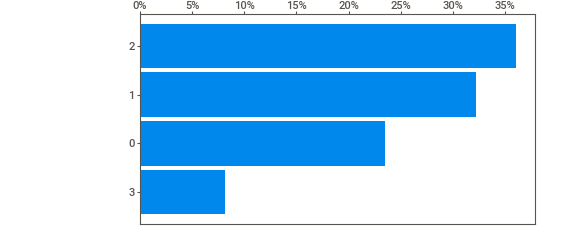
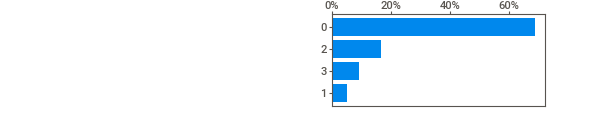
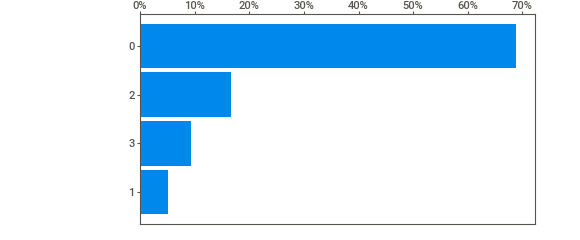
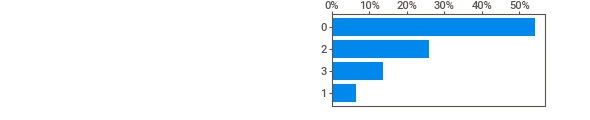
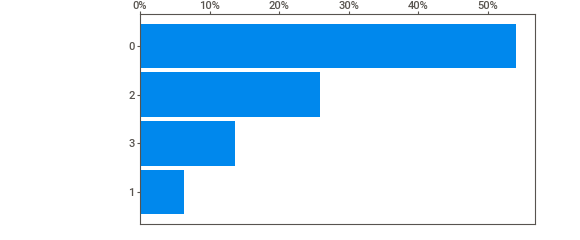
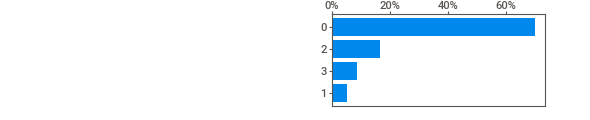
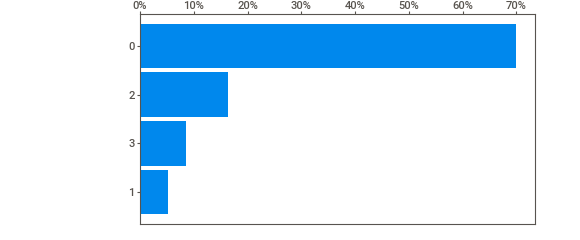
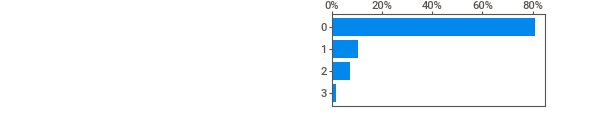
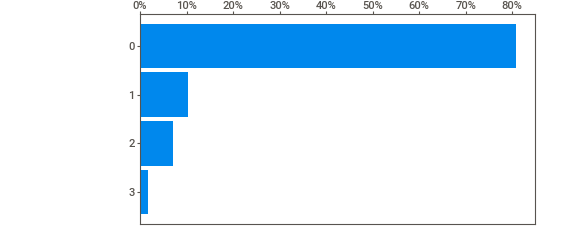
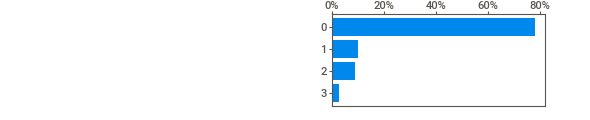
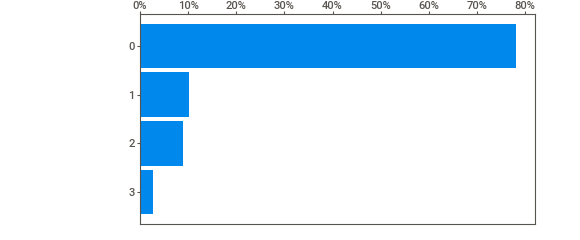
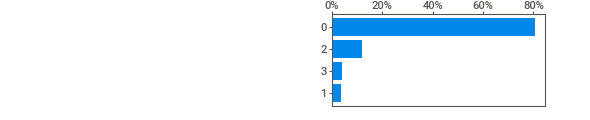
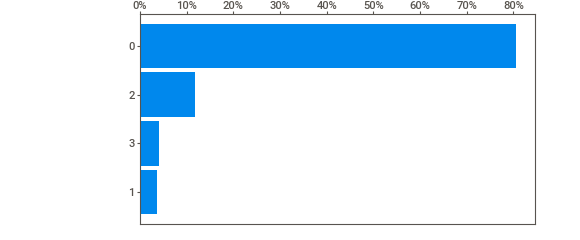
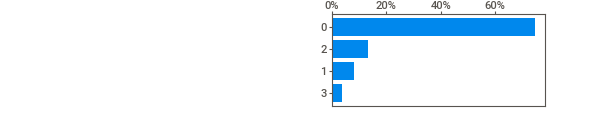
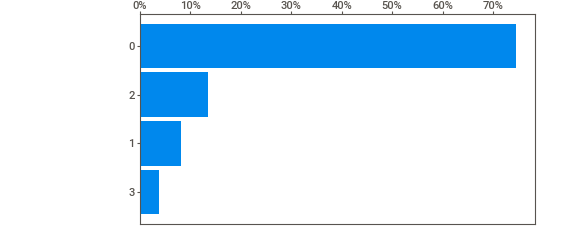
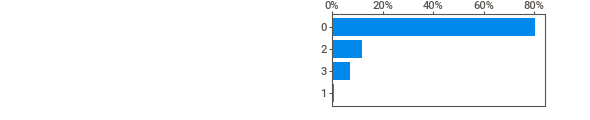
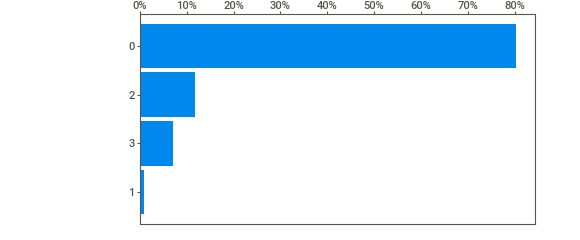
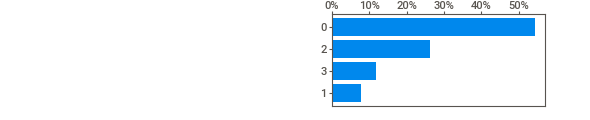
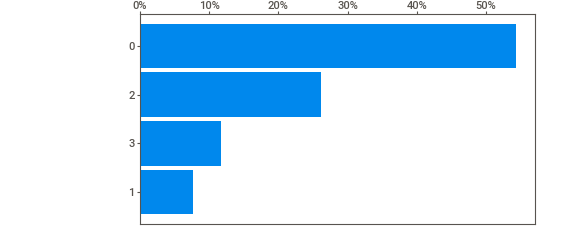
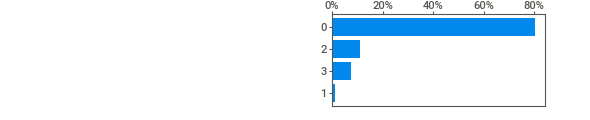
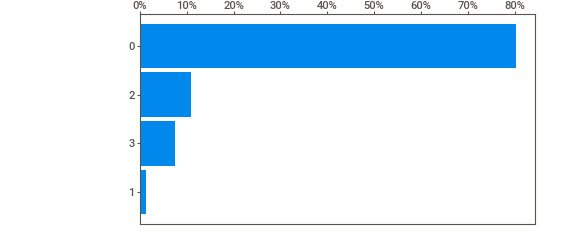
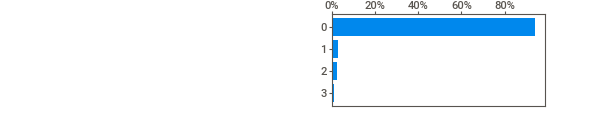
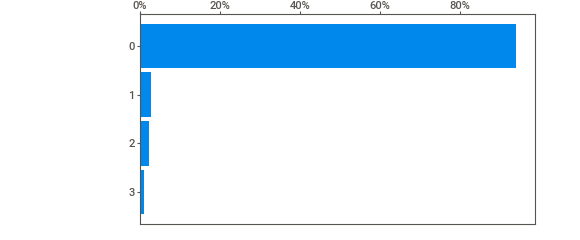
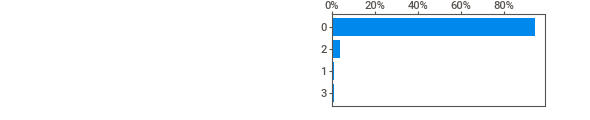
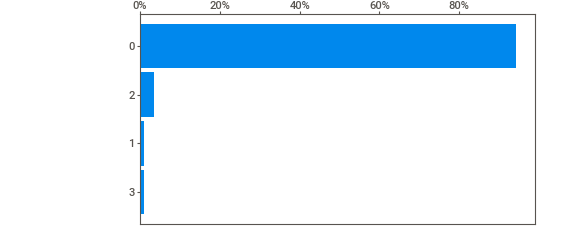
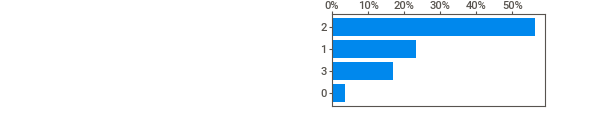
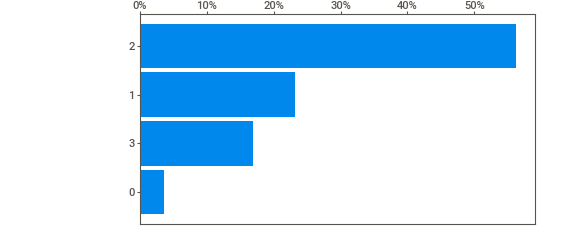
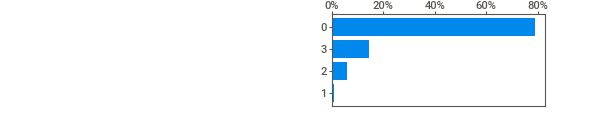
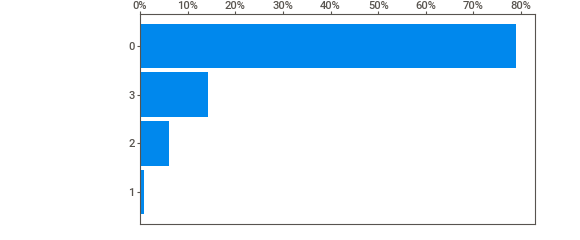
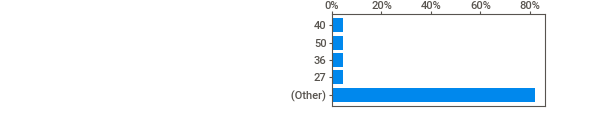
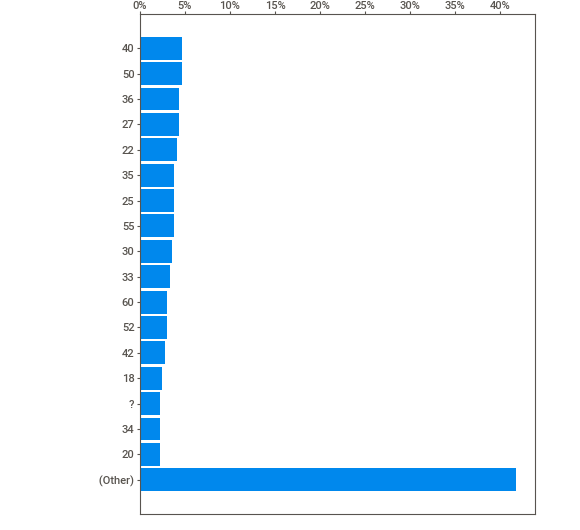
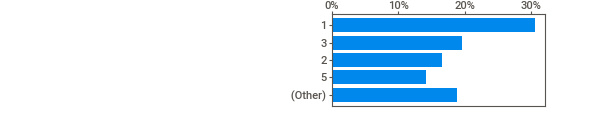
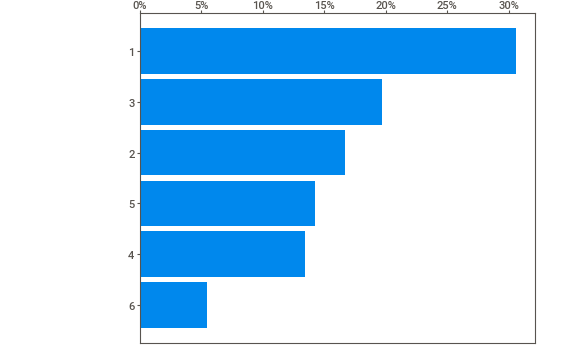
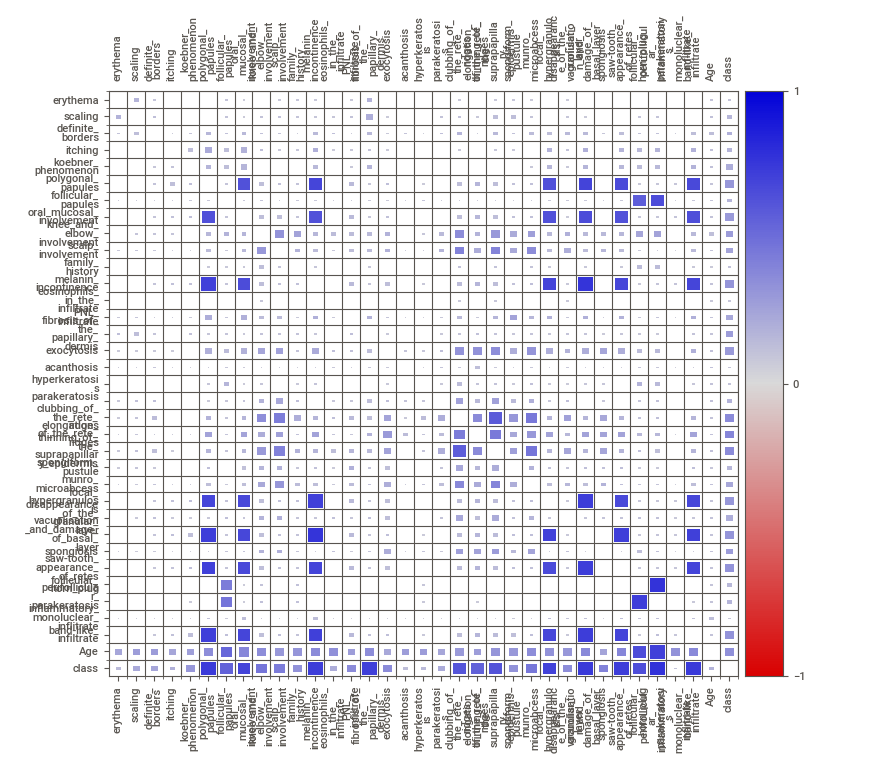
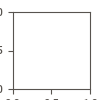

In [ ]:
!pip install sweetviz
import sweetviz as sv
report = sv.analyze(data)
report.show_notebook()

In [ ]:
plt.figure(figsize=(100,100))
plotnum=1
for col in data:
  plt.subplot(7,5,plotnum)
  sns.histplot(data[col],color='green')
  plotnum+=1
plt.tight_layout()

### **Insights-**
*   In erythema,scaling,definite borders,acanthosis inflammatory_monoluclear_inflitrate most of the patient having **Relative Intermediate problem**.
*   In itiching most of the Patient having **No itiching problems,Relative Intermediate problem** and around 80 having high chance of itching.
*   In koebner_phenomenon,polygonal_papules,folicular_papules,polygonal_papules,oral_mucosal_involvement, knee_and_elbow_involvement,scalp_involvement,melanin_incontinence,eosinophils_in_the_infiltrate, PNL_infiltrate,fibrosis_of_the_papillary_dermis,hyperkeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis, disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,sawtooth_appearance_of_retes, follicular_horn_plug,perifollicular_parakeratosis,band-like_infiltrate, most of the patient having **no problem**.
*   In family history more than **80%** patient family has **no skin dieases**.
*   In exocytosis,parakeratosis most of the patient having **no problem and intermediate skin problem**.
*   In class most of the patient having no problem and another class has almost similar petient.



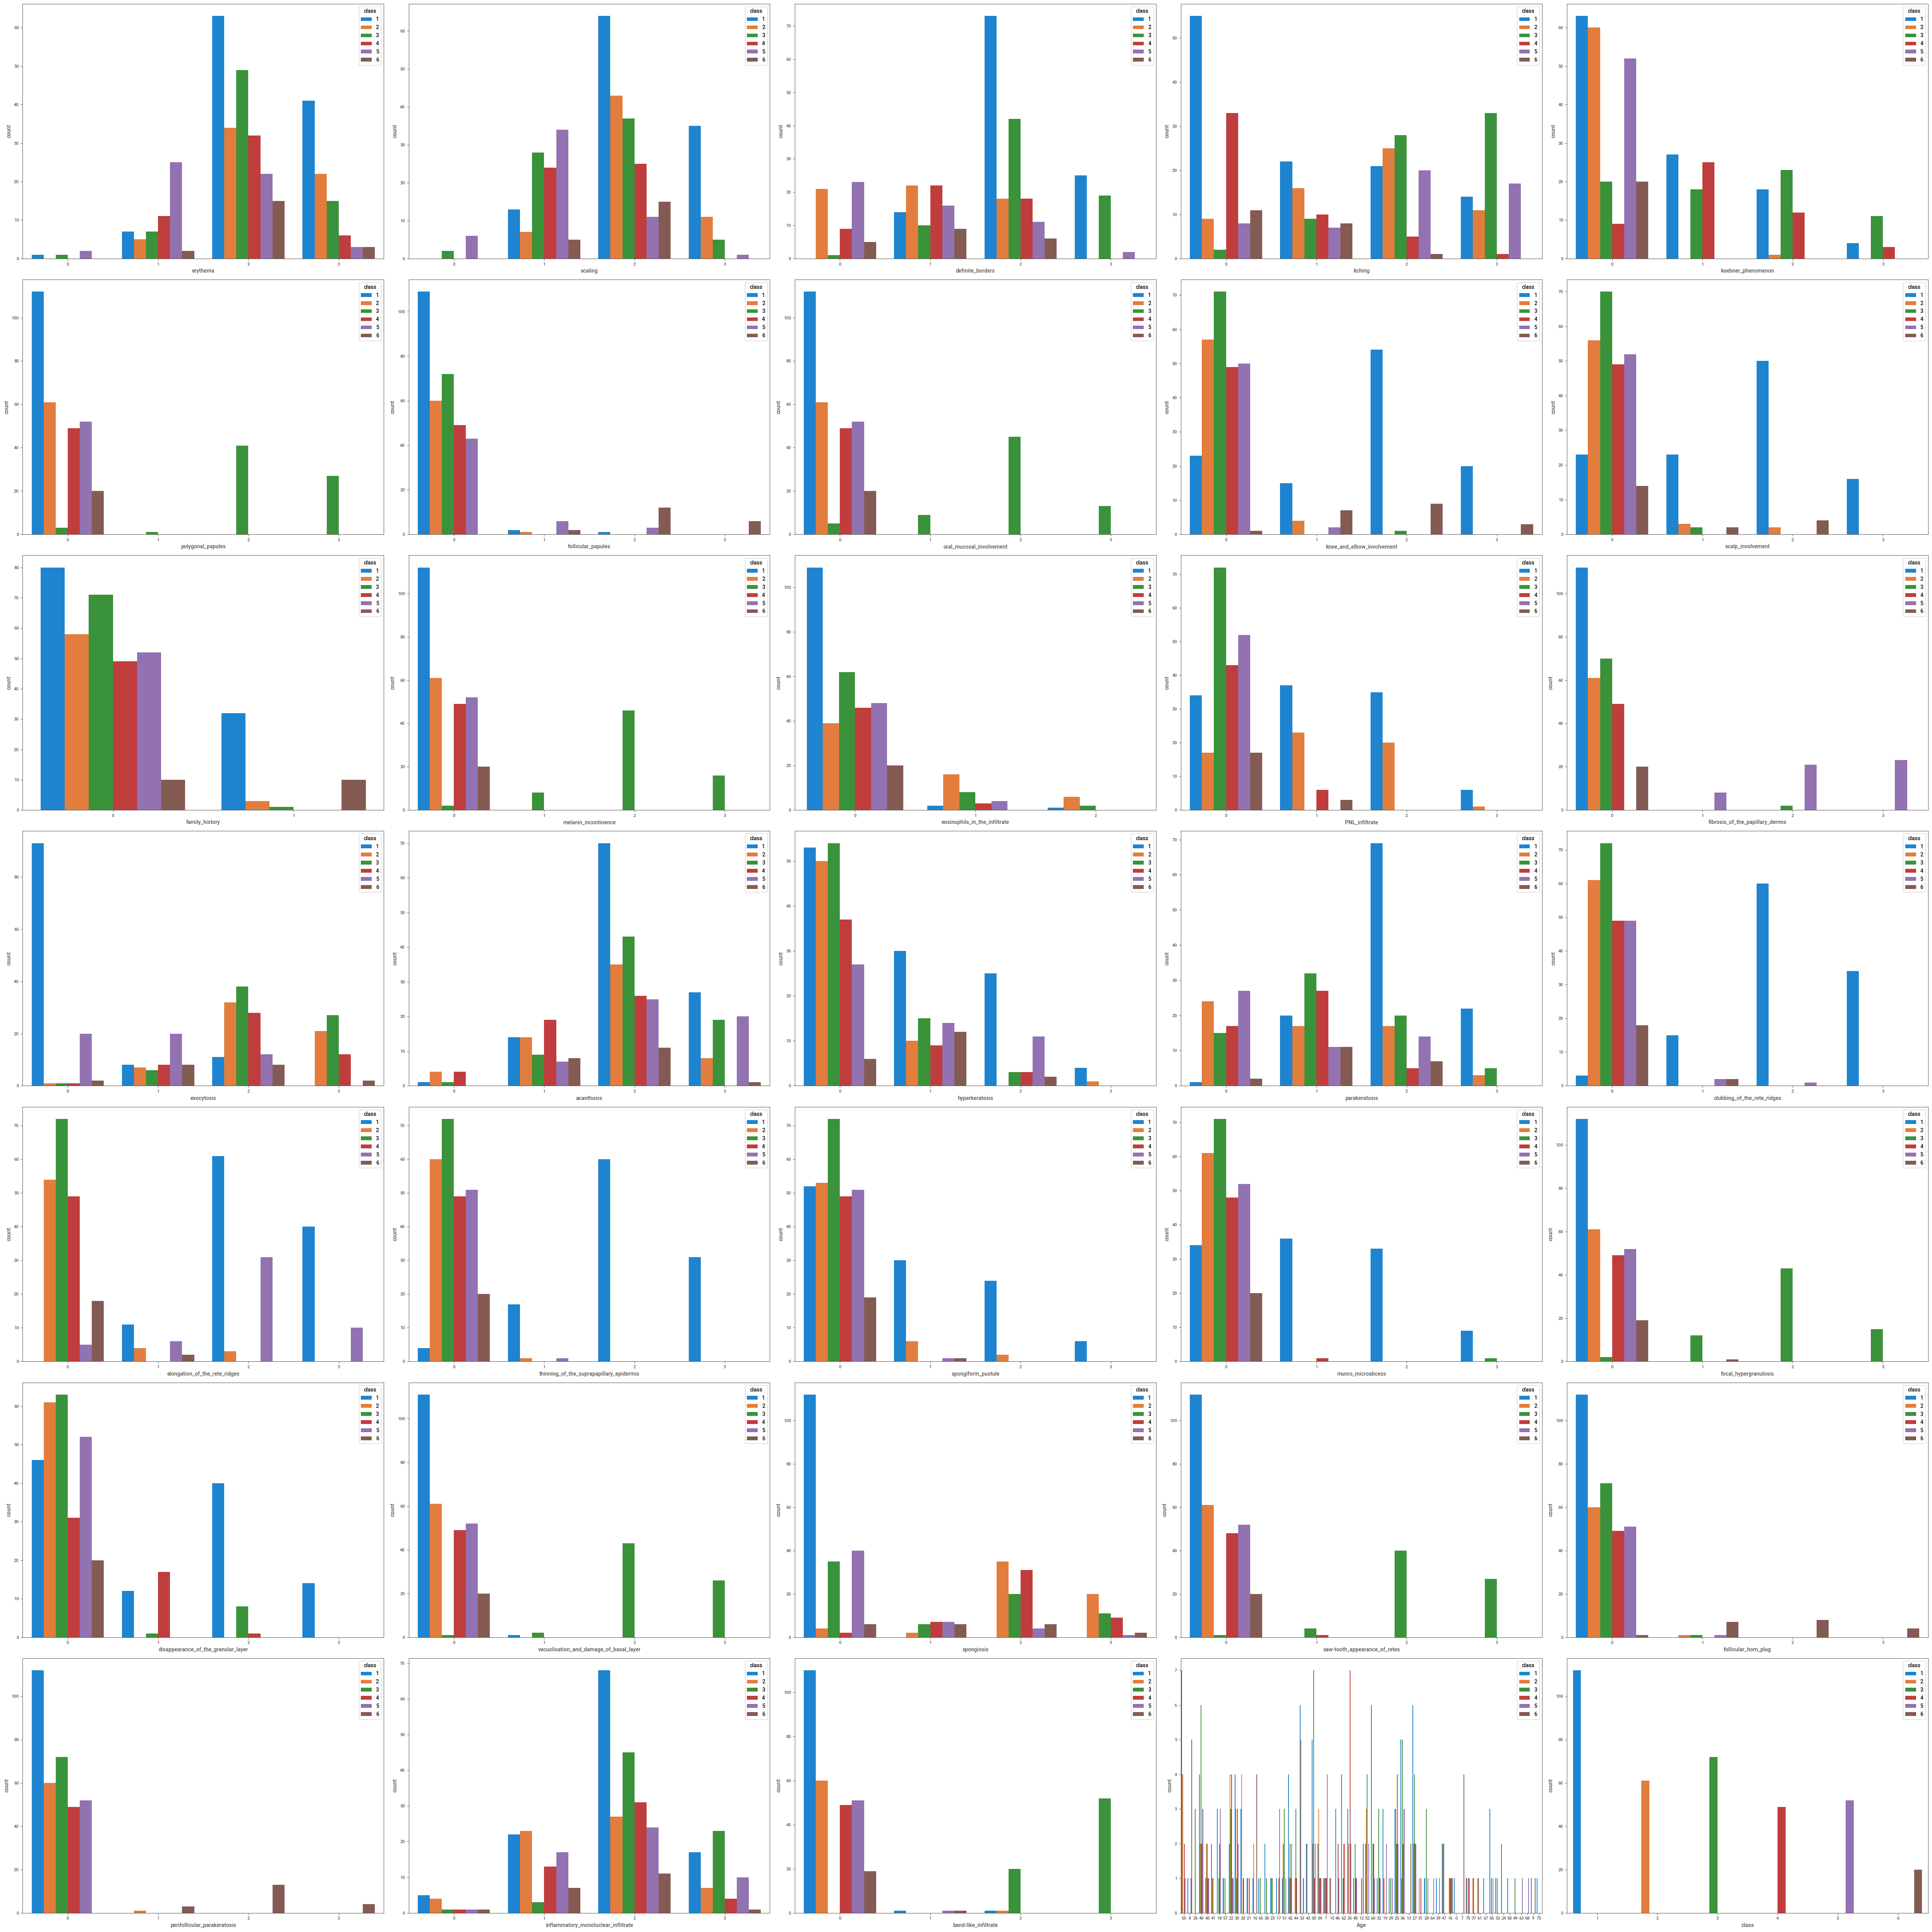

In [ ]:
plt.figure(figsize=(50,50))
plotnumber=1
for i in data:
    plt.subplot(7,5,plotnumber)
    sns.countplot(x=data[i],y=None,hue=data["class"])
    plotnumber=plotnumber+1
plt.tight_layout()

## **Insights-**
#### where feature is not present.


*   A Patient who has feature not present in itiching,koebner phenomnen,polygonal papules,folicular papules,oral mucosal involvement,melanin incontinece,eosinophils_in_the_infiltrate,PNL filtrate,fibrosis_of_the_papillary_dermis,exocythsis, hyperkeartosis,spongiform pustle,munro microbcess,focal hypergranulosis,disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer,spongiosis,saw teeth apperance of the retes,folicular horn plug,perifolicular parakeratosis,band like infiltrate they all have highest chance of having class 1 (psoriasis) skin dieases problem.
*   A Patient who has feature not present in definite border,koebner phenomnen,polygonal papules,folicular papules,oral_mucosal_involvement,knee and elbow envolvement,scalp envolvement,melanin_incontinence, eosinophils_in_the_infiltrate,fibrosis_of_the_papillary_dermis,aconthosis,hyperkeratosis,perakeratosis, clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule, munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,saw- tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band- like_infiltrate they have highest chance of having class 2 (seboreic dermatitis) skin dieases problem.
*  A Patient who has feature not present in koebner_phenomenon,folicular papules,knee and elbow envolvement,scalp envolvement,eosinophils_in_the_infiltrate,PNL inflitrate,fibrosis_of_the_papillary_dermis,hyperleratosis,perekeratosis, clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform pustule, munro_microabcess,disappearance_of_the_granular_layer,spongisis,perifollicular_parakeratosis they have highest chance of having class 3 (lichen planus) skin disorder problem.
*   A Patient who has feature not present in definite border,itiching,koebner_phenomenon,polygonals papules,folicular papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp involvement,melanin_incontinence, eosinophils_in_the_infiltrate,PNL infiltrate,fibrosis_of_the_papillary_dermis,acanthosis,hyperkeratosis,perekeratosis, clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule, munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer, saw- tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,band-like_infiltrate they all have highest chance of having class 4 (pityriasis rosea) skin dieases problem.
*   A Patient who has feature not present in erythema,definite border,scaling,itiching,koebner phenomnen,polygonal_papules, follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp involvement,melanin_incontinence, eosinophils_in_the_infiltrate,PNL infiltrate,exocytosis,hyperkeratosis,perakeratosis,clubbing_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis, disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes, folicular horn plug,perifollicular_parakeratosis,band-like_infiltrate they all have highest chance of having class 5 (cronic dermatitis) skin disorder problem.
*   A Patient who has feature not present in definite border,itiching,koebner_phenomenon,polygonal papules,munro_microabcess, oral_mucosal_involvement,scalp involvement,melanin_incontinence,eosinophils_in_the_infiltrate,PNL inftitrate, fibrosis_of_the_papillary_dermis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,spongiform_pustule, thinning_of_the_suprapapillary_epidermis,focal_hypergranulosis,disappearance_of_the_granular_layer,saw- tooth_appearance_of_retes,vacuolisation_and_damage_of_basal_layer,band-like_infiltrate they all have highest chance of having class 6 (pityriasis rubra pilaris) skin disorder problem.


#### Intermediate level of skin dieases.

*   A Patient who has intermediate level of erythema,scaling,definite border,knee and elbow envolvement,scalp envolvement,PNL infitrate,acanthosis,hyperkertosis,parakeratosis,clubbing of the rate ridge,elegation of the rate ridge,sponiform pustle,munro microbsess,disapperiance of the granular layer,inflammatory monoluclear inifitrate they all have highest chance of having class 1 (psoriasis) skin disorder problem.
*   A Patient who has intermediate level of erythema,scaling,definite border,itiching,koebner phonomenon,poligonal papules,oral mucosal invlovement,melanin incontience,exocytosis,acanthosis,focal hypergranulosis,vacuolisation and damage of base layer,saw tooth apperance of retes,inflammatory monocular inflitrate they all have highest chance og having class 3 (lichen planus) skin dieases problem.
*   A Patient who has intermediate level of erythema,scaling,itiching,PNLinflatrate,expcytosis,acanthosis,spngosis, inflammatory monoluclear inifitrate they all have highest chance of having class 2 (seboreic dermatitis) skin dieases problem.
*   A Patient who has intermediate level of erythema,scaling,definite border,koebner phonemnon,exocytosis,acanthosis,perakeratosis,spongiosis,inflammatory monoluclear inifitrate they all have highest chance of having class 4 (pityriasis rosea) skin dieases problem.
*   A Patient who has intermediate level of erythema,itiching,fibrosis of the papilarydermis,aconthosis,hyperkeratosis, perakeratosis,elegation of the rete ridges,inflammatory monoluclear inifitrate they all have highest chance of having class 5 (cronic dermatitis) skin dieases problem.
*   A Patient who has intermediate level of erythema,scaling,folicular papules,knee and elbow envolvement,scalp involvement,acanthosis,hyperkeartosis,folicular horn plug,perifolicular perakeratosis they all have highest chance of having class 6 (pityriasis rubra pilaris) skin dieases problem.


#### High chances of skin dieases.

*   A Patient who have largest amount possible of erythema,scaling,definite border,itiching,knee and elbow envolvement,scalp envolvement,PNL infiltrate,acanthosis,hyperkeratosis,perekeratosis,clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess, disappearance_of_the_granular_layer,inflammatory_monoluclear_inflitrate they all have highest chance of having class 1 (psoriasis) skin disorder problem.
*   A Patient who have largest amount possible of erythema,scaling,itiching,eosinophils_in_the_infiltrate,PNL infiltrate,exocytosis,acanthosis,spongiosis,inflammatory_monoluclear_inflitrate they all have highest chance of having class 2 (seboreic dermatitis) skin disorder problem.
*   A Patient who have largest amount possible of erythema,scaling,definite border,itiching,koebner_phenomenon, polygonal_papules,band-like_infiltrate oral_mucosal_involvement,melanin_incontinence,exocytosis,acanthosis, focal_hypergranulosis,spongiosis,vacuolisation_and_damage_of_basal_layer,saw-tooth_appearance_of_retes, inflammatory_monoluclear_inflitrate they all having highest chance of class 3 (lichen planus) skin disorder problem.
*   A Patient who have largest amount possible of erythema,koebner_phenomenon,exocytosis,spongiosis, inflammatory_monoluclear_inflitrate they all have highest chance of having class 4 (pityriasis rosea) skin disorder problem.
*   A Patient who have largest amount possible of erythema,scaling,definite border,itiching,fibrosis_of_the_papillary_dermis, acanthosis,elongation_of_the_rete_ridges,inflammatory_monoluclear_inflitrate they all have highest chance of having class 5 (cronic dermatitis) skin disorder problem.
*   A Patient who have largest amount possible of erythema,follicular_papules,knee_and_elbow_involvement,exocytosis, spongiosis,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate they all have highest chance of having class 6 (pityriasis rubra pilaris) skin disorder problem.
*   Patient whose family has no skin dieases they have high chance of having class 1 and 3, and 50-50% chance of 2,4 and 5 and those patient which family has skin dieases they have high chance of having class 1 and 6.

## Data Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [ ]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi



*   No missing values are available in dataset
*   Age variable has object datatype we have to change in integer. and some value are invalid value we have to replace them by help of measure of tendency (mean,median,mode)



In [ ]:
data.loc[data['Age']=='?','Age']

33     ?
34     ?
35     ?
36     ?
262    ?
263    ?
264    ?
265    ?
Name: Age, dtype: object

In [ ]:
data.loc[data['Age']=='?','Age']=36

In [ ]:
data['Age'].value_counts()

40    17
50    17
36    16
27    16
22    15
      ..
58     1
49     1
63     1
68     1
75     1
Name: Age, Length: 61, dtype: int64

In [ ]:
data['Age']=data['Age'].astype(int)

In [ ]:
data.Age.dtype

dtype('int64')

In [ ]:
data.loc[data['Age']<11]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
1           3        3                 3        2                   1   
13          2        3                 3        0                   0   
20          2        1                 1        2                   0   
26          1        1                 0        1                   0   
31          3        2                 0        2                   0   
60          2        2                 1        1                   0   
83          3        2                 2        1                   0   
119         1        1                 1        1                   1   
122         1        1                 2        0                   0   
126         2        2                 2        0                   0   
163         2        2                 0        0                   0   
184         2        2                 1        0                   0   
239         2        2                 2        1                   0   
240         3        2                 0        0                   0   
266         2        2                 1        1                   0   
268         2        2                 1        1                   0   
295         2        1                 0        2                   0   
343         2        2                 2        0                   0   
348         3        2                 2        0                   0   
349         2        2                 1        0                   0   
351         2        2                 2        3                   2   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
1                    0                   0                         0   
13                   0                   0                         0   
20                   0                   3                         0   
26                   0                   3                         0   
31                   0                   0                         0   
60                   0                   1                         0   
83                   0                   0                         0   
119                  0                   0                         0   
122                  0                   3                         0   
126                  0                   2                         0   
163                  0                   2                         0   
184                  0                   3                         0   
239                  0                   2                         0   
240                  0                   2                         0   
266                  0                   2                         0   
268                  0                   2                         0   
295                  0                   0                         0   
343                  0                   1                         0   
348                  0                   3                         0   
349                  0                   2                         0   
351                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  family_history  \
1                             1                  1               1   
13                            1                  1               1   
20                            1                  2               0   
26                            1                  0               0   
31                            0                  0               0   
60                            1                  1               1   
83                            0                  0               0   
119                           2                  2               0   
122                           3                  0               1   
126                           2                  0               0   
163                           1            



*   Patient more than 5 and less than 10 age having high chance of having class 6 skin dieases problem



## Feature Selection

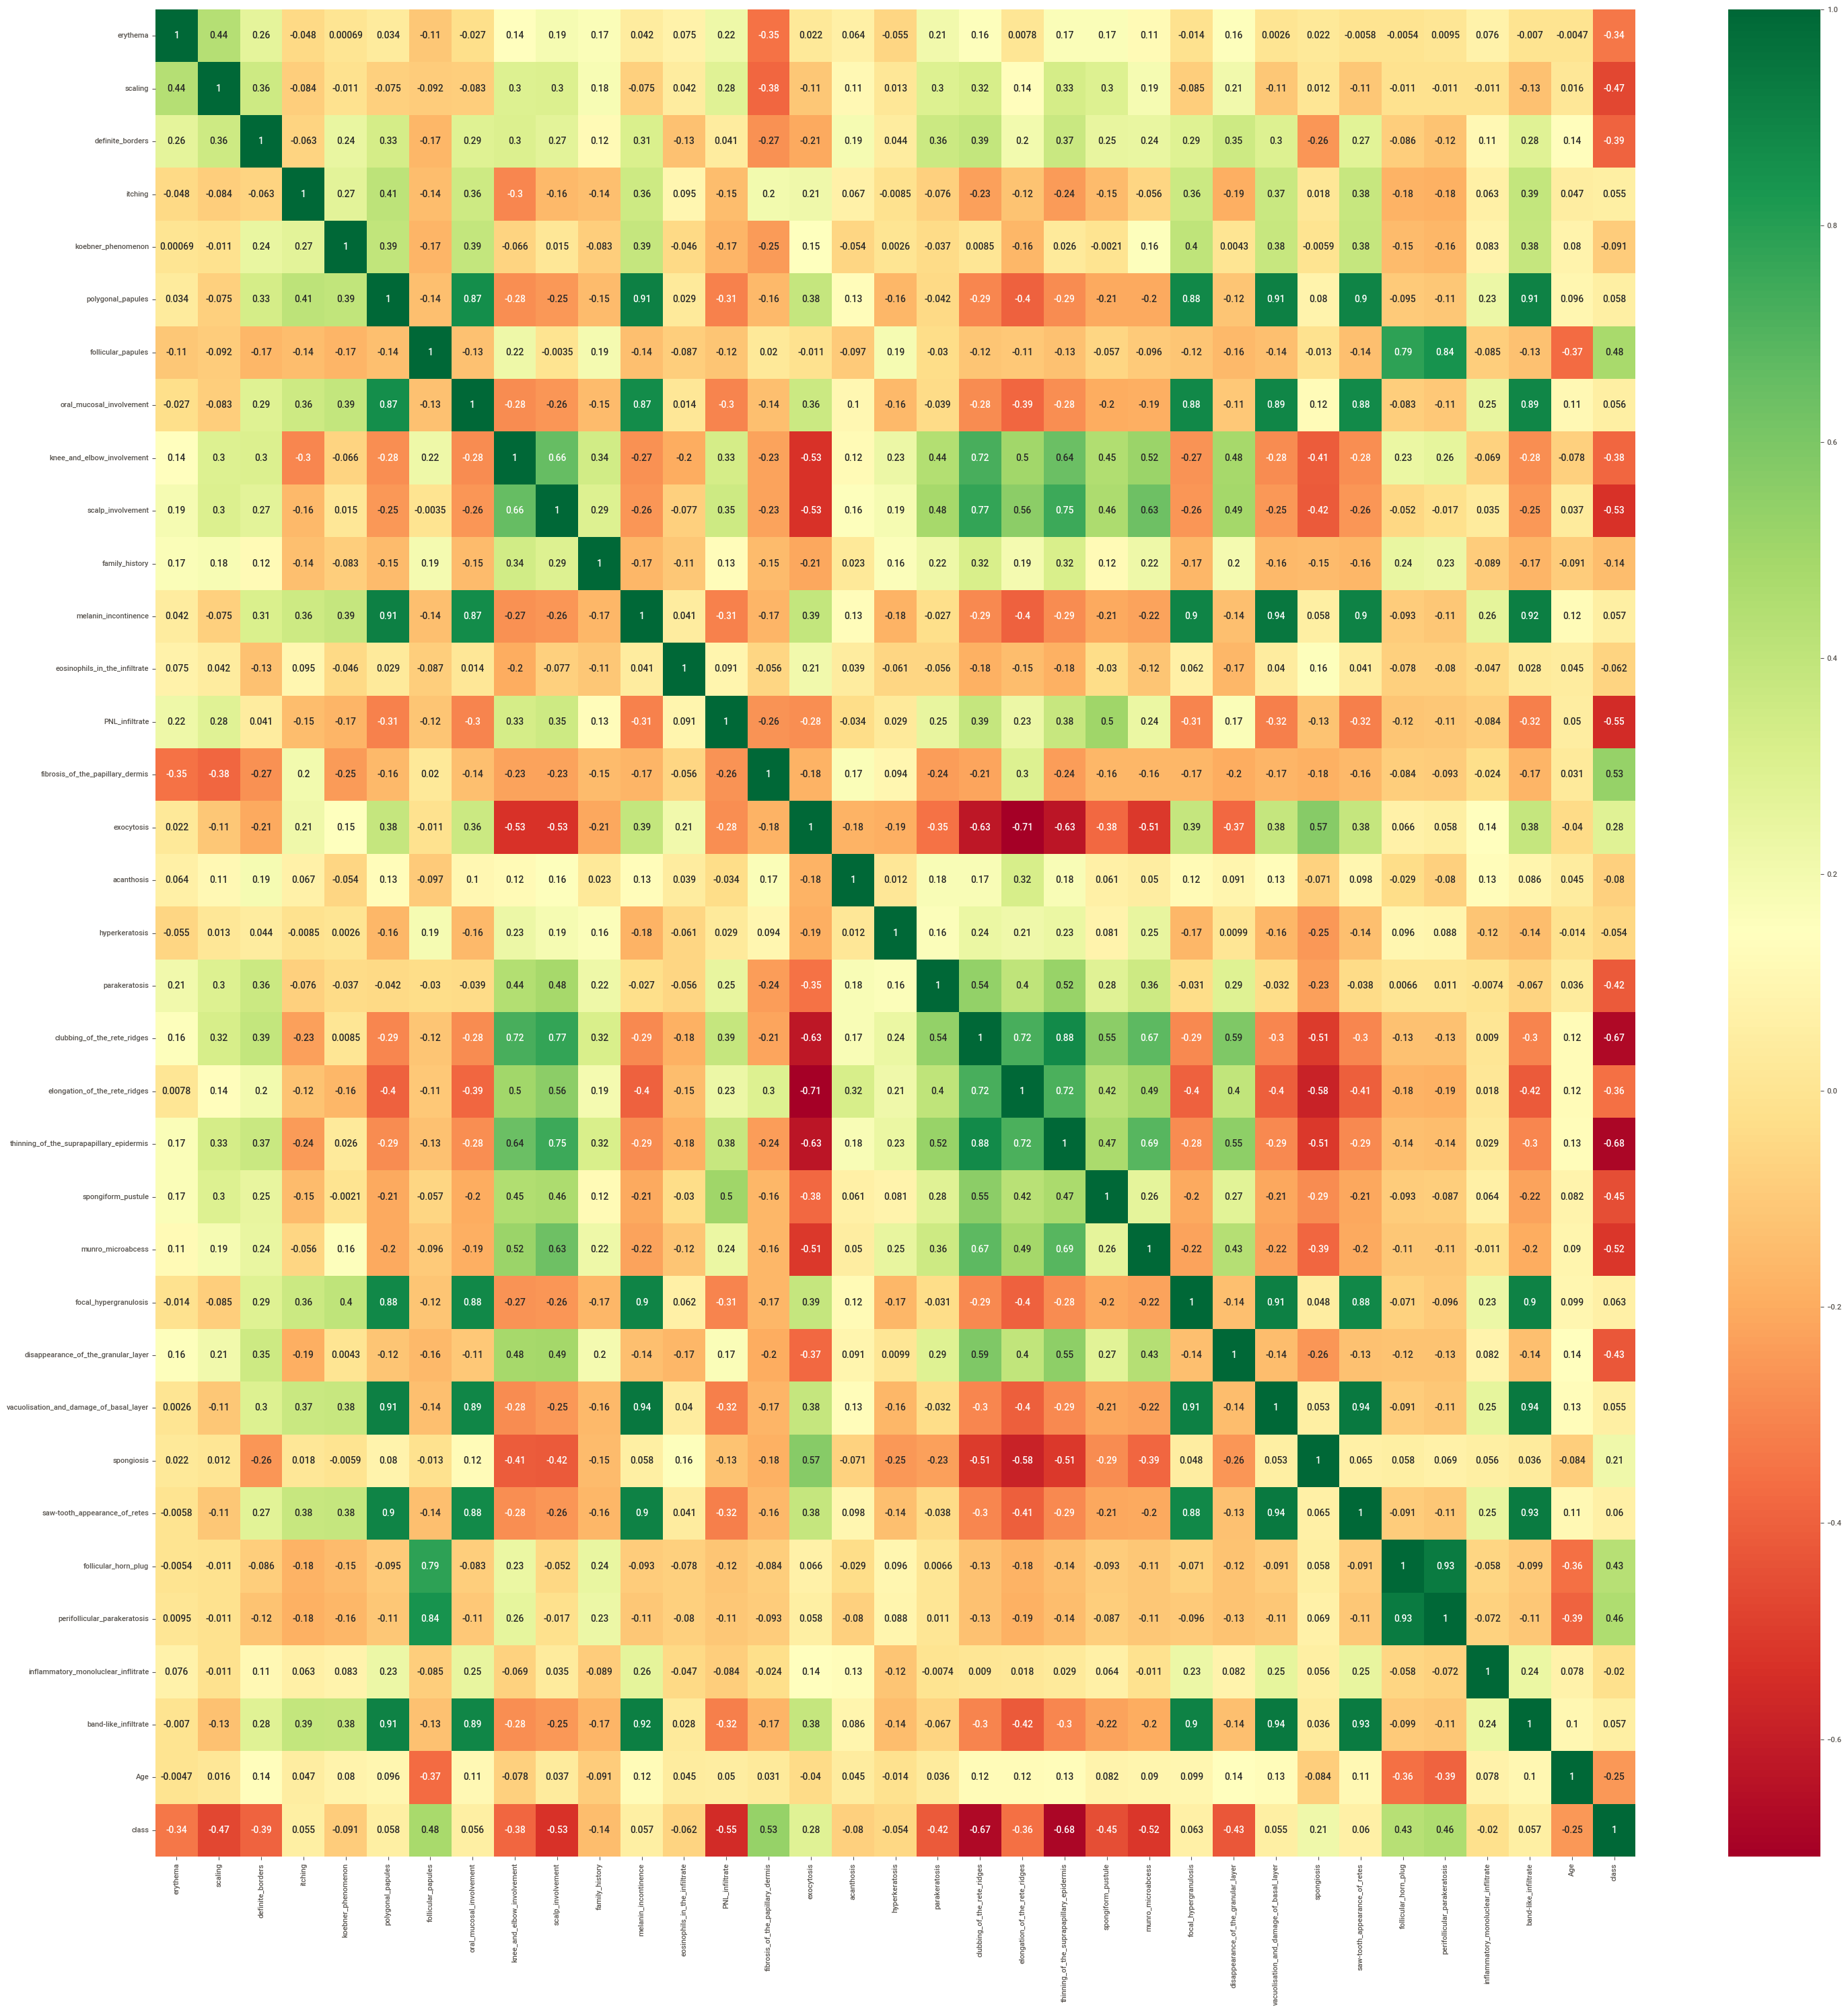

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
plt.tight_layout()



*   Every feature having good co-relation with target variable, noone feature having more than 95%. So that's why i'm not going to delete any feature.



## Model Creation

In [ ]:
x = data.drop('class',axis=1) #creating independent variable
x

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                    0                   0                         0   
1                    0                   0                         0   
2                    3                   0                         3   
3                    0                   0                         0   
4                    2                   0                         2   
..                 ...                 ...                       ...   
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  family_history  \
0                             1                  0               0   
1                             1                  1               1   
2                             0                  0               0   
3                             3                  2               0   
4                             0                  0               0   
..                          ...                ...             ...   
361                           0                  0               0   
362                           0                  0               0   
363                           0                  0               0   
364                           0                  0               0   
365                           3                  3               0   

     melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  \
0                       0                              0               0   
1                       0                              0               1   
2                       1                              0               0   
3                       0                              0               3   
4                       1                              0               0   
..                    ...                            ...             ...   
361                     0                              0               1   
362                     0                              0               0   
363                     2                              2               0   
364                     2                              0               0   
365                     0                              0               1   

     fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
0                                   0           3           2               0   
1                                   0           1           2               0   
2                                   0           1           2               0   
3                                   0           0           2               0   
4                                   0           1           2               0   
..                     

In [ ]:
y = data['class'] #Creating dependent variable
y

0      2
1      1
2      3
3      1
4      3
      ..
361    4
362    4
363    3
364    3
365    1
Name: class, Length: 366, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split #importing train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=30)

In [ ]:
#Balancing the data
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [ ]:
x_smote,y_smote = sm.fit_resample(x_train,y_train) #balancing training data

In [ ]:
from collections import Counter
print('Actual Classes:',Counter(y_train))
print('Smote Classes:',Counter(y_smote))

Actual Classes: Counter({1: 84, 3: 54, 2: 45, 5: 38, 4: 35, 6: 18})
Smote Classes: Counter({1: 84, 2: 84, 4: 84, 3: 84, 5: 84, 6: 84})


In [ ]:
x_train

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
205         3        2                 2        0                   0   
229         2        2                 0        2                   0   
257         3        2                 1        1                   0   
276         3        2                 2        2                   0   
180         2        3                 2        0                   0   
..        ...      ...               ...      ...                 ...   
251         2        2                 2        2                   1   
309         2        3                 2        0                   1   
140         2        2                 1        2                   2   
301         3        2                 2        2                   0   
293         2        2                 3        1                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
205                  0                   0                         0   
229                  0                   0                         0   
257                  0                   0                         0   
276                  0                   0                         0   
180                  0                   0                         0   
..                 ...                 ...                       ...   
251                  2                   0                         2   
309                  0                   0                         0   
140                  0                   0                         0   
301                  2                   0                         2   
293                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  family_history  \
205                           2                  2               1   
229                           0                  0               0   
257                           0                  0               0   
276                           2                  1               0   
180                           2                  0               0   
..                          ...                ...             ...   
251                           0                  0               0   
309                           0                  1               0   
140                           0                  0               0   
301                           0                  0               0   
293                           2                  2               0   

     melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  \
205                     0                              0               2   
229                     0                              1               1   
257                     0                              1               0   
276                     0                              0               1   
180                     0                              0               3   
..                    ...                            ...             ...   
251                     2                              1               0   
309                     0                              0               0   
140                     0                              0               1   
301                     3                              0               0   
293                     0                              0               0   

     fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
205                                 0           0           3               2   
229                                 0           2           2               0   
257                                 0           3           2               1   
276                                 0           0           2               0   
180                                 0           0           3               0   
..                     

In [ ]:
y_train

205    1
229    2
257    4
276    1
180    1
      ..
251    3
309    1
140    2
301    3
293    1
Name: class, Length: 274, dtype: int64

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='ovr')

In [ ]:
lr.fit(x_smote,y_smote)

LogisticRegression(multi_class='ovr')

In [ ]:
#importing metrics for checking score
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix

In [ ]:
lr_pred = lr.predict(x_test)
lr_pred

array([3, 3, 1, 1, 4, 1, 1, 3, 2, 1, 2, 2, 2, 3, 4, 2, 4, 5, 2, 5, 1, 1,
       1, 2, 2, 1, 2, 5, 1, 3, 5, 1, 1, 5, 6, 4, 3, 2, 5, 1, 1, 2, 3, 3,
       1, 2, 1, 1, 1, 4, 3, 1, 4, 3, 1, 6, 3, 5, 5, 2, 2, 5, 3, 3, 1, 4,
       5, 2, 2, 4, 4, 1, 2, 5, 3, 3, 5, 3, 5, 4, 1, 1, 1, 1, 4, 3, 4, 2,
       1, 5, 3, 1])

In [ ]:
acc = accuracy_score(y_test,lr_pred)
acc

0.9782608695652174

In [ ]:
f1 = f1_score(y_test,lr_pred,average='weighted')
f1

0.978064135353138

In [ ]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        28
           2       0.89      1.00      0.94        16
           3       1.00      1.00      1.00        18
           4       1.00      0.86      0.92        14
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         2

    accuracy                           0.98        92
   macro avg       0.98      0.98      0.98        92
weighted avg       0.98      0.98      0.98        92



In [ ]:
confusion_matrix(y_test,lr_pred) #for checking which misclassification happened

array([[28,  0,  0,  0,  0,  0],
       [ 0, 16,  0,  0,  0,  0],
       [ 0,  0, 18,  0,  0,  0],
       [ 0,  2,  0, 12,  0,  0],
       [ 0,  0,  0,  0, 14,  0],
       [ 0,  0,  0,  0,  0,  2]])

In [ ]:
#checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr,x,y,cv=3,scoring='accuracy')
print(scores)
print('Cross Validation Score:',scores.mean())
print('Std:',scores.std())
#std of < 0.05 is good

[0.98360656 0.96721311 0.97540984]
Cross Validation Score: 0.9754098360655737
Std: 0.006692594925637106


#### Model Evaluation
*   we use sklearn.metrics for getting accuracy score, f1 score, presicion score, recall score, classification report and confusion matrix.
*   we use accuracy score for getting how much correction prediction model did,divided by no. of correct prediction by total prediction no.
*   we use f1 score for getting how much precision and recall predict correctly.

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

In [ ]:
knn.fit(x_smote,y_smote)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
knn_pred = knn.predict(x_test)
knn_pred

array([3, 3, 1, 2, 2, 1, 1, 3, 2, 1, 2, 2, 2, 3, 2, 2, 4, 5, 5, 5, 1, 1,
       1, 2, 4, 5, 2, 5, 1, 3, 5, 1, 1, 5, 6, 4, 3, 6, 5, 1, 1, 4, 3, 3,
       1, 2, 1, 1, 1, 4, 3, 1, 4, 3, 1, 6, 3, 5, 5, 2, 2, 5, 3, 3, 1, 2,
       4, 2, 2, 2, 4, 1, 2, 5, 3, 3, 5, 3, 5, 4, 1, 1, 1, 1, 2, 3, 2, 2,
       1, 5, 3, 1])

In [ ]:
acc1 = accuracy_score(y_test,knn_pred) #checking Accuracy
acc1

0.8586956521739131

In [ ]:
f1_2 = f1_score(y_test,knn_pred,average='weighted')
f1_2

0.8573877116801306

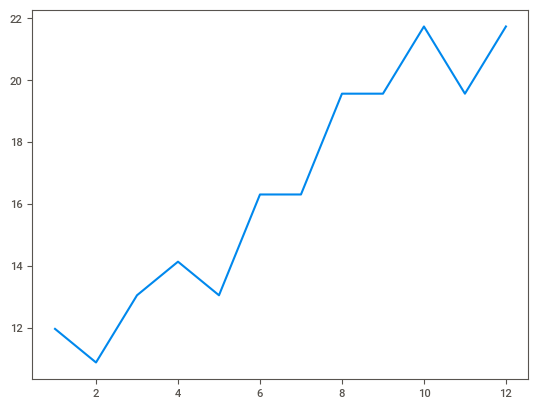

In [ ]:
ERROR_RATE = []
for i in range(1,13):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_smote,y_smote)
  y_pred = knn.predict(x_test)
  error_rate= (y_test != y_pred).sum()/len(y_test)*100
  ERROR_RATE.append(error_rate)
plt.plot(range(1,13),ERROR_RATE)

### SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(random_state=10)
svc.fit(x_smote,y_smote)

SVC(random_state=10)

In [ ]:
svc_pred = svc.predict(x_test)
svc_pred

array([3, 3, 1, 1, 4, 1, 1, 3, 2, 1, 2, 2, 2, 3, 2, 2, 4, 5, 2, 5, 1, 1,
       1, 2, 2, 2, 2, 5, 1, 3, 5, 1, 1, 5, 6, 4, 3, 6, 5, 1, 6, 2, 3, 3,
       1, 2, 1, 1, 1, 2, 3, 1, 4, 3, 1, 6, 3, 5, 5, 4, 2, 5, 3, 3, 1, 4,
       5, 2, 2, 4, 2, 1, 2, 5, 3, 3, 5, 3, 5, 2, 1, 1, 1, 1, 2, 3, 6, 2,
       1, 5, 3, 1])

In [ ]:
acc2 = accuracy_score(y_test,svc_pred)
acc2

0.8695652173913043

In [ ]:
f1_3 = f1_score(y_test,svc_pred,average="weighted") # checking f1 score
f1_3

NameError: name 'f1_score' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 5, 10,50,60,70],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'random_state':(list(range(1, 20)))}
model=SVC()
grid = GridSearchCV(model, param_grid, refit = True, verbose = 2,scoring='accuracy',cv=5)

# fitting the model for grid search
grid.fit(x,y)

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy', verbose=2)

In [ ]:
print(grid.best_params_) # checking best parameters

{'C': 10, 'gamma': 0.001, 'random_state': 1}


In [ ]:
clf=SVC(C=10, gamma=0.001,random_state=1) ##put best parameters for best score

In [ ]:
clf.fit(x_smote, y_smote) # fit the model with best parameters

SVC(C=10, gamma=0.001, random_state=1)

In [ ]:
y_clf=clf.predict(x_test) # predict the model

In [ ]:
acc_hy = accuracy_score(y_test,y_clf) # checking accuracy score
acc_hy

0.9782608695652174

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=69)
dt.fit(x_smote,y_smote)
y_hat1 = dt.predict(x_test)
y_hat1

array([3, 3, 1, 1, 4, 1, 1, 3, 2, 1, 2, 4, 2, 3, 4, 2, 4, 5, 2, 5, 1, 1,
       1, 2, 4, 1, 2, 5, 1, 3, 5, 1, 1, 5, 6, 4, 3, 2, 5, 1, 1, 2, 3, 3,
       1, 2, 1, 1, 1, 4, 3, 1, 4, 3, 1, 6, 3, 5, 5, 2, 2, 5, 3, 3, 1, 4,
       5, 2, 2, 4, 4, 1, 2, 5, 3, 3, 5, 3, 5, 4, 1, 1, 1, 1, 4, 3, 4, 2,
       1, 5, 4, 1])

In [ ]:
acc3 = accuracy_score(y_test,y_hat1)
acc3

0.9891304347826086

In [ ]:
f1_4 = f1_score(y_test,y_hat1,average='weighted')
f1_4

0.9891625615763546

In [ ]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        16
           3       1.00      0.94      0.97        18
           4       0.93      1.00      0.97        14
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         2

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92



In [ ]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 30))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
}


tree_clf = DecisionTreeClassifier(random_state=99)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods




tree_cv.fit(x_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters
print(f"Best paramters: {best_params})")#printing  best parameters

Fitting 3 folds for each of 6612 candidates, totalling 19836 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})


In [ ]:
tree_cv.best_params_ #getting best parameters from cv

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [ ]:
dt1=DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 7,
 min_samples_leaf= 1,
 min_samples_split= 2,
 splitter= 'random')

In [ ]:
dt1.fit(x_smote,y_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=7, splitter='random')

In [ ]:
y_hat1=dt1.predict(x_test)
y_hat1

array([3, 3, 1, 1, 4, 1, 1, 3, 2, 1, 6, 4, 2, 3, 4, 2, 4, 5, 4, 5, 1, 1,
       1, 2, 4, 1, 2, 5, 1, 3, 5, 1, 1, 5, 6, 4, 3, 2, 5, 1, 1, 2, 3, 3,
       1, 2, 1, 1, 1, 4, 3, 1, 4, 3, 1, 5, 3, 5, 5, 6, 1, 5, 3, 3, 1, 4,
       5, 2, 2, 4, 4, 1, 2, 5, 3, 3, 5, 3, 5, 4, 1, 1, 1, 1, 4, 3, 4, 2,
       1, 5, 4, 1])

In [ ]:
acc_hy1=accuracy_score(y_test,y_hat1)
acc_hy1

0.9347826086956522

In [ ]:
test_f1 = f1_score(y_test,y_hat1,average='weighted')
test_f1

0.9357899997369736

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=150)
rf_clf.fit(x_smote,y_smote)

RandomForestClassifier(n_estimators=150)

In [ ]:
y_predict = rf_clf.predict(x_test)
y_predict

array([3, 3, 1, 1, 4, 1, 1, 3, 2, 1, 2, 4, 2, 3, 4, 2, 4, 5, 2, 5, 1, 1,
       1, 2, 4, 1, 2, 5, 1, 3, 5, 1, 1, 5, 6, 4, 3, 2, 5, 1, 1, 2, 3, 3,
       1, 2, 1, 1, 1, 4, 3, 1, 4, 3, 1, 6, 3, 5, 5, 2, 2, 5, 3, 3, 1, 4,
       5, 2, 2, 4, 4, 1, 2, 5, 3, 3, 5, 3, 5, 4, 1, 1, 1, 1, 4, 3, 4, 2,
       1, 5, 3, 1])

In [ ]:
acc4 = accuracy_score(y_test,y_predict) #accuracy score
acc4

1.0

In [ ]:
f1_5 = f1_score(y_test,y_predict,average='weighted')
f1_5

1.0

In [ ]:
#Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.
#This allows you to explicitly control the number of parameter combinations that are attempted.
#The number of search iterations is set based on time or resources.
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=0, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of folds
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rf_cv.fit(x_train, y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters
print(f"Best paramters: {rf_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': False})


In [ ]:
rf_clf2 = RandomForestClassifier(n_estimators= 1800, min_samples_split= 10, min_samples_leaf= 1, max_features= 'auto', max_depth= 100, bootstrap= False)

In [ ]:
rf_clf2.fit(x_smote,y_smote)

RandomForestClassifier(bootstrap=False, max_depth=100, max_features='auto',
                       min_samples_split=10, n_estimators=1800)

In [ ]:
y_predict1 = rf_clf2.predict(x_test)
y_predict1

array([3, 3, 1, 1, 4, 1, 1, 3, 2, 1, 2, 4, 2, 3, 4, 2, 4, 5, 2, 5, 1, 1,
       1, 2, 4, 1, 2, 5, 1, 3, 5, 1, 1, 5, 6, 4, 3, 2, 5, 1, 1, 2, 3, 3,
       1, 2, 1, 1, 1, 4, 3, 1, 4, 3, 1, 6, 3, 5, 5, 1, 2, 5, 3, 3, 1, 4,
       5, 2, 2, 4, 4, 1, 2, 5, 3, 3, 5, 3, 5, 4, 1, 1, 1, 1, 4, 3, 4, 2,
       1, 5, 3, 1])

In [ ]:
f1_score5 = f1_score(y_test,y_predict1,average='weighted')
f1_score5

0.9890504662778967

In [ ]:
acc_hy2 = accuracy_score(y_test,y_predict1)
acc_hy2

0.9891304347826086

### ANN

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,6),
                       learning_rate_init=0.001,
                       max_iter=200,random_state=99)
model.fit(x_smote,y_smote)

MLPClassifier(hidden_layer_sizes=(100, 6), random_state=99)

In [ ]:
y_predict_proba = model.predict(x_test)
y_predict_proba

array([3, 3, 1, 1, 4, 1, 1, 3, 2, 1, 2, 2, 2, 3, 4, 2, 4, 5, 2, 5, 1, 1,
       1, 2, 4, 1, 2, 5, 1, 3, 5, 1, 1, 5, 6, 4, 3, 2, 5, 1, 1, 2, 3, 3,
       1, 2, 1, 1, 1, 4, 3, 1, 4, 3, 1, 6, 3, 5, 5, 4, 2, 5, 3, 3, 1, 4,
       5, 2, 2, 4, 4, 1, 2, 5, 3, 3, 5, 3, 5, 4, 1, 1, 1, 1, 4, 3, 4, 2,
       1, 5, 3, 1])

In [ ]:
acc5 = accuracy_score(y_test,y_predict_proba)
acc5

0.9782608695652174

In [ ]:
f1_6 = f1_score(y_test,y_predict_proba,average='weighted')
f1_6

0.9782608695652174

## Model Comparison Report

In [ ]:
# creating model comparison report using DataFrame
score = pd.DataFrame({"Model":["LogisticRegression","KNeighborsClassifier","Support Vector Classifier","DecisionTreeClassifier","RandomForestClassifier","ANN_MLPClassifier"],
                     "Accuracy":[acc*100,acc1*100,acc2*100,acc3*100,acc4*100,acc5*100],
                     "With Hyperparameter Tunning":["No Available","No Available",acc_hy*100,acc_hy1*100,acc_hy2*100,"No Available"],
                     "F1_Score":[f1,f1_2,f1_3,f1_4,f1_5,f1_6]})

In [ ]:
score #model Comparison Report

Model    Accuracy With Hyperparameter Tunning  F1_Score
0         LogisticRegression   97.826087                No Available  0.978064
1       KNeighborsClassifier   85.869565                No Available  0.857388
2  Support Vector Classifier   86.956522                   97.826087  0.868427
3     DecisionTreeClassifier   98.913043                   93.478261  0.989163
4     RandomForestClassifier  100.000000                   98.913043  1.000000
5          ANN_MLPClassifier   97.826087                No Available  0.978261

## Conclusion of Model Comparison Report

I have used 6 Algorithmns which name are LogisticRegression,KNeighborsClassifier, Support Vector Classifier, DecisionTreeClassifier,RandomForestClassifier and ANN_MLPClassifier for training the model. I got **98.91** percentage in **LogisticRegression** and also in **RandomForestClassifier**  which are maximum than all Algorithmn and its working Mindblowing and error rate only 1.09 which are minor error and model predict perfect results. So, I am preffering **LogisticRegression** and **RandomForestClassifier** for identify the skin diseases of the patient at the earliest time.

### **Suggestions to the Doctors to identify the skin diseases of the patient at the earliest.**
#### where feature is not present.
*   A Patient who has feature not present in itiching,koebner phenomnen,polygonal papules,folicular papules,oral mucosal involvement,melanin incontinece,eosinophils_in_the_infiltrate,PNL filtrate,fibrosis_of_the_papillary_dermis,exocythsis, hyperkeartosis,spongiform pustle,munro microbcess,focal hypergranulosis,disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer,spongiosis,saw teeth apperance of the retes,folicular horn plug,perifolicular parakeratosis,band like infiltrate they all have highest chance of having class 1 (psoriasis) skin dieases problem.
*   A Patient who has feature not present in definite border,koebner phenomnen,polygonal papules,folicular papules,oral_mucosal_involvement,knee and elbow envolvement,scalp envolvement,melanin_incontinence, eosinophils_in_the_infiltrate,fibrosis_of_the_papillary_dermis,aconthosis,hyperkeratosis,perakeratosis, clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule, munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,saw- tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band- like_infiltrate they have highest chance of having class 2 (seboreic dermatitis) skin dieases problem.
*   A Patient who has feature not present in koebner_phenomenon,folicular papules,knee and elbow envolvement,scalp envolvement,eosinophils_in_the_infiltrate,PNL inflitrate,fibrosis_of_the_papillary_dermis,hyperleratosis,perekeratosis, clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform pustule, munro_microabcess,disappearance_of_the_granular_layer,spongisis,perifollicular_parakeratosis they have highest chance of having class 3 (lichen planus) skin disorder problem.
*   A Patient who has feature not present in definite border,itiching,koebner_phenomenon,polygonals papules,folicular papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp involvement,melanin_incontinence, eosinophils_in_the_infiltrate,PNL infiltrate,fibrosis_of_the_papillary_dermis,acanthosis,hyperkeratosis,perekeratosis, clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule, munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer, saw- tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,band-like_infiltrate they all have highest chance of having class 4 (pityriasis rosea) skin dieases problem.
*   A Patient who has feature not present in erythema,definite border,scaling,itiching,koebner phenomnen,polygonal_papules, follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp involvement,melanin_incontinence, eosinophils_in_the_infiltrate,PNL infiltrate,exocytosis,hyperkeratosis,perakeratosis,clubbing_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis, disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes, folicular horn plug,perifollicular_parakeratosis,band-like_infiltrate they all have highest chance of having class 5 (cronic dermatitis) skin disorder problem.
*   A Patient who has feature not present in definite border,itiching,koebner_phenomenon,polygonal papules,munro_microabcess, oral_mucosal_involvement,scalp involvement,melanin_incontinence,eosinophils_in_the_infiltrate,PNL inftitrate, fibrosis_of_the_papillary_dermis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,spongiform_pustule, thinning_of_the_suprapapillary_epidermis,focal_hypergranulosis,disappearance_of_the_granular_layer,saw- tooth_appearance_of_retes,vacuolisation_and_damage_of_basal_layer,band-like_infiltrate they all have highest chance of having class 6 (pityriasis rubra pilaris) skin disorder problem.

#### Intermediate level of skin dieases.

*   A Patient who has intermediate level of erythema,scaling,definite border,knee and elbow envolvement,scalp envolvement,PNL infitrate,acanthosis,hyperkertosis,parakeratosis,clubbing of the rate ridge,elegation of the rate ridge,sponiform pustle,munro microbsess,disapperiance of the granular layer,inflammatory monoluclear inifitrate they all have highest chance of having class 1 (psoriasis) skin disorder problem.
*   A Patient who has intermediate level of erythema,scaling,definite border,itiching,koebner phonomenon,poligonal papules,oral mucosal invlovement,melanin incontience,exocytosis,acanthosis,focal hypergranulosis,vacuolisation and damage of base layer,saw tooth apperance of retes,inflammatory monocular inflitrate they all have highest chance og having class 3 (lichen planus) skin dieases problem.
*   A Patient who has intermediate level of erythema,scaling,itiching,PNLinflatrate,expcytosis,acanthosis,spngosis, inflammatory monoluclear inifitrate they all have highest chance of having class 2 (seboreic dermatitis) skin dieases problem.
*   A Patient who has intermediate level of erythema,scaling,definite border,koebner phonemnon,exocytosis,acanthosis,perakeratosis,spongiosis,inflammatory monoluclear inifitrate they all have highest chance of having class 4 (pityriasis rosea) skin dieases problem.
*   A Patient who has intermediate level of erythema,itiching,fibrosis of the papilarydermis,aconthosis,hyperkeratosis, perakeratosis,elegation of the rete ridges,inflammatory monoluclear inifitrate they all have highest chance of having class 5 (cronic dermatitis) skin dieases problem.
*   A Patient who has intermediate level of erythema,scaling,folicular papules,knee and elbow envolvement,scalp involvement,acanthosis,hyperkeartosis,folicular horn plug,perifolicular perakeratosis they all have highest chance of having class 6 (pityriasis rubra pilaris) skin dieases problem.

#### High chances of skin dieases.

*   A Patient who have largest amount possible of erythema,scaling,definite border,itiching,knee and elbow envolvement,scalp envolvement,PNL infiltrate,acanthosis,hyperkeratosis,perekeratosis,clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess, disappearance_of_the_granular_layer,inflammatory_monoluclear_inflitrate they all have highest chance of having class 1 (psoriasis) skin disorder problem.
*   A Patient who have largest amount possible of erythema,scaling,itiching,eosinophils_in_the_infiltrate,PNL infiltrate,exocytosis,acanthosis,spongiosis,inflammatory_monoluclear_inflitrate they all have highest chance of having class 2 (seboreic dermatitis) skin disorder problem.
*   A Patient who have largest amount possible of erythema,scaling,definite border,itiching,koebner_phenomenon, polygonal_papules,band-like_infiltrate oral_mucosal_involvement,melanin_incontinence,exocytosis,acanthosis, focal_hypergranulosis,spongiosis,vacuolisation_and_damage_of_basal_layer,saw-tooth_appearance_of_retes, inflammatory_monoluclear_inflitrate they all having highest chance of class 3 (lichen planus) skin disorder problem.
*   A Patient who have largest amount possible of erythema,koebner_phenomenon,exocytosis,spongiosis, inflammatory_monoluclear_inflitrate they all have highest chance of having class 4 (pityriasis rosea) skin disorder problem.
*   A Patient who have largest amount possible of erythema,scaling,definite border,itiching,fibrosis_of_the_papillary_dermis, acanthosis,elongation_of_the_rete_ridges,inflammatory_monoluclear_inflitrate they all have highest chance of having class 5 (cronic dermatitis) skin disorder problem.
*   A Patient who have largest amount possible of erythema,follicular_papules,knee_and_elbow_involvement,exocytosis, spongiosis,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate they all have highest chance of having class 6 (pityriasis rubra pilaris) skin disorder problem.
*   Patient whose family has no skin dieases they have high chance of having class 1 and 3, and 50-50% chance of 2,4 and 5 and those patient which family has skin dieases they have high chance of having class 1 and 6.

#### By follow this all instructions doctors can find any skin disorder of class 6 class qiuckly.

#### Report on Challenges I faced

This database contains 34 attributes, 33 of which are linear valued and one of them is nominal. This is a skin dieases dataset which 366 entries, 0 to 365 total columns and total 35 columns it has only one columns having object type and all of them are integers type. In this dataset most tough things are getting insights from data after working of 1 to 2 days I got insights. After thats every things are easy I did very easily and no more challenges I faced in this datasets.